In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
datatrain=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [3]:
datatrain=datatrain.dropna()
datatrain.isnull().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [4]:
datatest=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [5]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


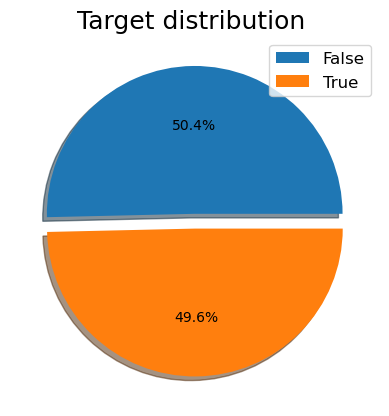

In [7]:
import matplotlib.pyplot as  plt
plt.pie(datatrain['Transported'].value_counts(), shadow=True, explode=[.05,.05], autopct='%.1f%%')
plt.title('Target distribution ', size=18)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()


In [8]:
datatrain.isnull().sum()
datatrain=datatrain.dropna()


In [9]:

datatrain.head(30)
datatrain['HomePlanet'].unique()
#datatrain['HomePlanet'].replace({'Europa': 1, 'Earth': 2, 'Mars': 3}, inplace=True)
datatrain['CryoSleep'].median()

0.0

In [10]:
datatrain['CryoSleep']=datatrain['CryoSleep'].replace({'False': 0, 'True': 1})
datatrain['CryoSleep']=datatrain['CryoSleep'].astype(int)

In [11]:
datatrain['VIP']=datatrain['VIP'].replace({'False': 0, 'True': 1})
datatrain['VIP']=datatrain['VIP'].astype(int)

In [12]:
#datatrain=datatrain.drop(columns='Name')
datatrain['Destination'].unique()
datatrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame 'datatrain' with a column 'Destination'
categorical_columns = ['Destination']

# Create the OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the categorical column
encoded_features = encoder.fit_transform(datatrain[categorical_columns]).toarray()

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded features and appropriate column names
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the encoded features with the original DataFrame and drop any NaN rows (if present)
encodedset = pd.concat([datatrain.drop(columns=categorical_columns).dropna(), encoded_features_df], axis=1)

# Print the resulting DataFrame after one-hot encoding
encodedset.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,0.0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,1.0
1,0002_01,Earth,0.0,F/0/S,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,1.0
2,0003_01,Europa,0.0,A/0/S,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,0.0,1.0
3,0003_02,Europa,0.0,A/0/S,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,0.0,1.0
4,0004_01,Earth,0.0,F/1/S,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,1.0


In [14]:
datatrain['HomePlanet'].unique()
encodedset=encodedset.dropna()

In [15]:

from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame 'encodedset' with a column 'HomePlanet'
categorical_columns1 = ['HomePlanet']

# Create the OneHotEncoder object
encoder1 = OneHotEncoder()

# Fit and transform the categorical column
encoded_features1 = encoder1.fit_transform(encodedset[categorical_columns1]).toarray()

# Get the feature names for the encoded columns
encoded_feature_names1 = encoder1.get_feature_names_out(categorical_columns1)

# Create a DataFrame with the encoded features and appropriate column names
encoded_features_df1 = pd.DataFrame(encoded_features1, columns=encoded_feature_names1)

# Concatenate the encoded features with the original DataFrame and drop any NaN rows (if present)
encodedset = pd.concat([encodedset.drop(columns=categorical_columns1).dropna(), encoded_features_df1], axis=1)

# Print the resulting DataFrame after one-hot encoding
encodedset

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,0.0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,1.0,0.0,1.0,0.0
1,0002_01,0.0,F/0/S,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,1.0,1.0,0.0,0.0
2,0003_01,0.0,A/0/S,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,0.0,1.0,0.0,1.0,0.0
3,0003_02,0.0,A/0/S,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,0.0,1.0,0.0,1.0,0.0
4,0004_01,0.0,F/1/S,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
4981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
4986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
4987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [16]:
#encodedset=encodedset.dropna()encodedset=encodedset.dropna()
encodedset=encodedset.dropna()
encodedset

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,0.0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,1.0,0.0,1.0,0.0
1,0002_01,0.0,F/0/S,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,1.0,1.0,0.0,0.0
2,0003_01,0.0,A/0/S,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,0.0,1.0,0.0,1.0,0.0
3,0003_02,0.0,A/0/S,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,0.0,1.0,0.0,1.0,0.0
4,0004_01,0.0,F/1/S,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,5333_01,0.0,G/862/P,48.0,0.0,456.0,0.0,39.0,0.0,5.0,Vane Andley,True,1.0,0.0,0.0,1.0,0.0,0.0
4994,5334_01,1.0,G/867/S,15.0,0.0,0.0,0.0,0.0,0.0,0.0,Besse Connon,True,0.0,0.0,1.0,1.0,0.0,0.0
4995,5334_02,0.0,G/867/S,30.0,0.0,0.0,674.0,39.0,0.0,10.0,Therly Connon,True,1.0,0.0,0.0,0.0,1.0,0.0
4997,5340_01,0.0,G/868/S,36.0,0.0,0.0,0.0,33.0,677.0,0.0,Cassa Carsoning,False,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
finaldata = encodedset.drop(columns=['Cabin', 'PassengerId', 'Name'])
finaldata['Transported']=finaldata['Transported'].replace({'False': 0, 'True': 1})
finaldata['Transported']=finaldata['Transported'].astype(int)
finaldata

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,48.0,0.0,456.0,0.0,39.0,0.0,5.0,1,1.0,0.0,0.0,1.0,0.0,0.0
4994,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0
4995,0.0,30.0,0.0,0.0,674.0,39.0,0.0,10.0,1,1.0,0.0,0.0,0.0,1.0,0.0
4997,0.0,36.0,0.0,0.0,0.0,33.0,677.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0


In [18]:
X=finaldata.drop(columns=['Transported'])
X.shape

(3784, 14)

In [19]:
y=finaldata['Transported']
y.shape

(3784,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model=RandomForestClassifier(random_state=42)

In [22]:
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [23]:
prediction=model.predict(X_test)
from sklearn.metrics import accuracy_score


In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,prediction)
print(f'Mean Squared Error: {mse}')
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy:.2f}')
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, prediction))

Mean Squared Error: 0.2535211267605634
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       572
           1       0.75      0.74      0.74       564

    accuracy                           0.75      1136
   macro avg       0.75      0.75      0.75      1136
weighted avg       0.75      0.75      0.75      1136



In [25]:
datatest=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
datatest.shape

(4277, 13)

In [26]:
#datatest=datatest.dropna()
datatest.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [27]:
testcheck=datatest.drop(columns=['Cabin', 'Name'])

In [28]:
testcheck = testcheck.fillna(testcheck.mode().iloc[0])
testcheck['CryoSleep']=testcheck['CryoSleep'].replace({'False': 0, 'True': 1})
testcheck['CryoSleep']=testcheck['CryoSleep'].astype(int)

In [29]:
testcheck['VIP']=testcheck['VIP'].replace({'False': 0, 'True': 1})
testcheck['VIP']=testcheck['VIP'].astype(int)

In [30]:
testcheck

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,0,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,1,55 Cancri e,18.0,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,0,TRAPPIST-1e,18.0,0,0.0,2680.0,0.0,0.0,523.0


In [31]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame 'testcheck' with a column 'Destination'
categorical_columns2 = ['Destination']

# Create the OneHotEncoder object
encoder2 = OneHotEncoder()

# Fit and transform the categorical column
encoded_features2 = encoder2.fit_transform(testcheck[categorical_columns2]).toarray()

# Get the feature names for the encoded columns
encoded_feature_names2 = encoder2.get_feature_names_out(categorical_columns2)

# Create a DataFrame with the encoded features and appropriate column names
encoded_features_df2 = pd.DataFrame(encoded_features2, columns=encoded_feature_names2)

# Concatenate the encoded features with the original DataFrame and drop any NaN rows (if present)
testencoded = pd.concat([testcheck.drop(columns=categorical_columns2).fillna(testcheck.mode().iloc[0]), encoded_features_df2], axis=1)

# Print the resulting DataFrame after one-hot encoding
testencoded.head()


,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,Earth,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0018_01,Earth,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0.0,0.0,1.0
2,0019_01,Europa,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0021_01,Europa,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0,1.0
4,0023_01,Earth,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0.0,0.0,1.0


In [32]:
testencoded=testencoded.fillna(testencoded.mode().iloc[0])

In [33]:

# Assuming you have a DalignataFrame 'testcheck' with a column 'Destination'
categorical_columns3 = ['HomePlanet']

# Create the OneHotEncoder object
encoder3 = OneHotEncoder()

# Fit and transform the categorical column
encoded_features3 = encoder3.fit_transform(testencoded[categorical_columns3]).toarray()

# Get the feature names for the encoded columns
encoded_feature_names3 = encoder3.get_feature_names_out(categorical_columns3)

# Create a DataFrame with the encoded features and appropriate column names
encoded_features_df3 = pd.DataFrame(encoded_features3, columns=encoded_feature_names3)

# Concatenate the encoded features with the original DataFrame and drop any NaN rows (if present)
testencoded = pd.concat([testencoded.drop(columns=categorical_columns3).dropna(), encoded_features_df3], axis=1)

# Print the resulting DataFrame after one-hot encoding
testencoded.head()


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [34]:

#testencoded=testencoded.dropna()
testencoded.isnull().sum()

PassengerId                  0
CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
dtype: int64

In [35]:
testencoded

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4273,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0,0.0,0.0,1.0,1.0,0.0,0.0
4274,9271_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4275,9273_01,0,18.0,0,0.0,2680.0,0.0,0.0,523.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
testprediction=model.predict(testencoded.drop(columns='PassengerId'))

In [37]:
testprediction=pd.DataFrame(testprediction) 
print(testprediction.shape)
print(testencoded.shape)

(4277, 1)
(4277, 15)


In [38]:
samplesubmit=pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [39]:
submission = pd.concat([testencoded['PassengerId'], testprediction], axis=1)

In [40]:
submission

,PassengerId,0
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,0
4275,9273_01,1


In [41]:
submission.rename(columns={0: 'Transported'}, inplace=True)


In [42]:
submission.shape

(4277, 2)

In [43]:
submission.to_csv('output_file.csv', index=False)


In [44]:
sub=pd.read_csv('/kaggle/working/output_file.csv')

In [45]:

sub

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,0
4275,9273_01,1
